In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

In [2]:
img = read_image('misc/demo.jpg')
img = t.from_numpy(img)[None]

In [3]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

Setting up a new session...
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/opt/anaconda3/lib/python3.7/http/client.py", line 1244, in request
    self._

Exception in user code:
------------------------------------------------------------


[array([[ 95.68785 ,  11.502972, 199.735   , 134.20657 ],
       [ 77.519775, 198.83322 , 344.1125  , 405.76926 ],
       [ 16.701637, 265.5125  , 244.15094 , 349.80682 ],
       [122.23392 , 433.08817 , 177.99713 , 449.9255  ]], dtype=float32)]
[array([ 6, 12, 14, 14], dtype=int32)]


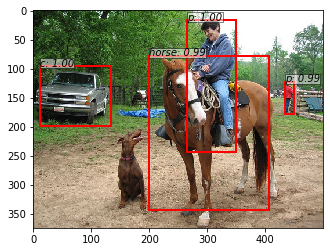

In [4]:
trainer.load('fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth')
opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it
print(_bboxes)
print(_labels)